In [1]:
#Please execute this cell
import sys
sys.path.append('../../')
import jupman
from sciprog import draw_mat
%matplotlib inline

# Matrix networks solutions

## [Download exercises zip](../../_static/matrix-networks-exercises.zip)

[Browse files online](https://github.com/DavidLeoni/datasciprolab/tree/master/exercises/matrix-networks)



## What to do

- unzip exercises in a folder, you should get something like this: 

```

-jupman.py
-sciprog.py
-other stuff ...
-exercises
     |- matrices
         |- matrix-networks-exercise.ipynb     
         |- matrix-networks-solution.ipynb
         |- other stuff ..
```

<div class="alert alert-warning">

**WARNING**: to correctly visualize the notebook, it MUST be in an unzipped folder !
</div>


- open Jupyter Notebook from that folder. Two things should open, first a console and then browser. The browser should show a file list: navigate the list and open the notebook `exercises/matrix-networks/matrix-networks-exercise.ipynb`
- Go on reading that notebook, and follow instuctions inside.


Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`
- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`
- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`
- If the notebooks look stuck, try to select `Kernel -> Restart`





## Introduction

Usual matrices from linear algebra are of great importance in computer science because they are used widely in many  fields, like for example in machine learning and network analysis. The following section will give you an appreciation of the meaning of matrices when considered as networks or, as we call them in computer science, _graphs_. 

In computer science a _graph_ is a set of nodes linked by a set of edges. You can visualize nodes as circles and links as arrows. For our purposes, arrows will be _directed_, that is, will have a line and a tip to show the direction.  Usually we will indicate nodes with numbers going from zero included but optionally they can be labelled. Again optionally, we sometimes we will assign a _weight_ to the edges, that is a number to be shown over the edges. Since we are dealing with directed graphs (in short, _digraphs_), we can have an arrow going from node 0 to node 1, but also another arrow going from node 1 to node 0 with possibly a different weight.

Here we will represent graphs as matrices, which performance-wise is particularly good when the matrix is _dense_, that is,  has many entries different from zero. Otherwise, when you have a so-called _sparse_ matrix (few non-zero entries), it would be best to represent the graph with _adjacency list_  but for now we ignore such representation and only focus to matrices.

    
* A row at index `i` represents the outward links from node `i` to the other `n` nodes, with possibly node `i` itself included. 
* A value of zero means there is no link to a given node. 
* In general, `mat[i][j]` is the weight of the edge between node `i` to node `j`



### Visualization examples

We defined a function `sciprog.draw_mat`to display matrices as graphs (you don't need to understand the internals, for now we won't go into depth about matrix visualizations)


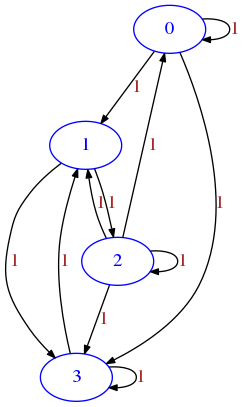

In [3]:
# PLEASE EXECUTE THIS CELL TO CHECK IF VISUALIZATION IS WORKING

# notice links with weight zero are not shown)
# (all weights are set to 1)

# first need to import this
import sys
sys.path.append('../../')
from sciprog import draw_mat

mat = [
    [1,1,0,1],  # node 0 is linked to node 0 itself, node 1 and node 2
    [0,0,1,1],  # node 1 is linked to node 2 and node 3
    [1,1,1,1],  # node 2 is linked to node 0, node 1, node 2 itself and node 3
    [0,1,0,1]   # node 3 is linked to node 1 and node 3 itself
  ]


draw_mat(mat)


### Minimal graph

With this representation derived from matrices as we intend them (that is with at least one row and one column), the corresponding minimal graph can have only one node:

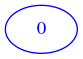

In [4]:
minimal = [
    [0]
]

draw_mat(minimal)

If we set the weight different from zero,  the zeroeth node will link to itself (here we put the weight 5 in the link):

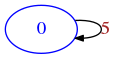

In [5]:
minimal = [
    [5]
]

draw_mat(minimal)

### Graph with two nodes example

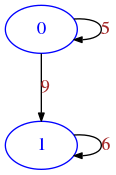

In [6]:
m = [
    [5,9], # node 0 links to node 0 itself with a weight of 5, and to node 1 with a weight of 9
    [0,6], # node 1 links to node 1 with a weight of 6
    
]

draw_mat(m)

### Distance matrix

Depending on the problem at hand, it may be reasonable to change the weights. For example, on a road network the nodes could represent places and the weights could be the distances. If we assume it is possible to travel in both directions on all roads, we get a matrix symmetric along the diagonal,  and we can call the matrix a  _distance matrix_. Talking about the diagonal, for the special case of going from a place to itself, we set that street length to 0 (which make sense for street length but could give troubles for other purposes, for example if we give the numbers the meaning 'is connected' a place should always be connected to itself)

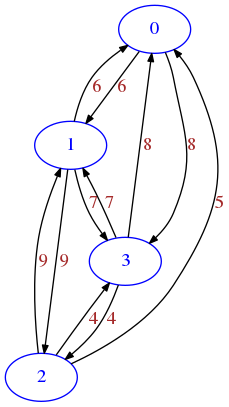

In [7]:
# distance matrix example 

mat = [
        [0,6,0,8],  # place 0 is linked to place 1 and place 2
        [6,0,9,7],  # place 1 is linked to place 0, place 2 and place 3
        [5,9,0,4],  # place 2 is linked to place 0, place 1 and place 3
        [8,7,4,0]   # place 3 is linked to place 0, place 1 and place 2 
      ]


draw_mat(mat)

More realistic traffic road network,  where going in one direction might take actually longer  than going back, because of one-way streets and different routing times.


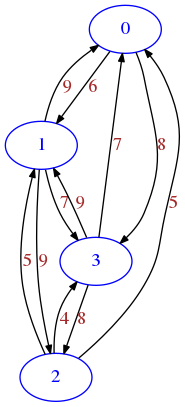

In [8]:

mat = [
        [0,6,0,8],  # place 0 is linked to place 1 and place 2
        [9,0,9,7],  # place 1 is linked to place 0, place 2 and place 3
        [5,5,0,4],  # place 2 is linked to place 0, place 1 and place 3
        [7,9,8,0]   # place 3 is linked to place 0, place 1, place 2 
      ]


draw_mat(mat)

### Boolean matrix example

If we are not interested at all in the weights, we might use only zeroes and ones as we did before. But this could have implications when doing operations on matrices, so some times it is better to use only `True` and `False`

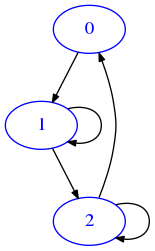

In [9]:
mat = [
    [False, True, False],
    [False, True, True],
    [True, False, True],
    
]
draw_mat(mat)

## Implementation

We are now ready to start implementing the following functions. Before even start implementation, for each try to interpret the matrix as a graph, drawing it on paper. When you're done implementing try to use `draw_mat` on the results.  Notice that since `draw_mat`  is a generic display function and knows nothing about the nature of the graph, sometimes it will  not show the graph in the optimal way we humans would use.

### line

This function is similar to `diag`. As that one, you can implement it in two ways: you can use a double `for`, or a single one. For the sake of the first part of the course the double `for` is acceptable, but in the second part it would be considered a waist of computing cycles.

What would be the graph representation of `diag` ?

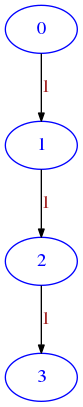

In [10]:

def line(n):
    """ RETURN a matrix as lists of lists where node i must have an edge to  to node i + 1 with weight 1
        Last node points to nothing
        n must be >= 1, otherwise rises ValueError        
    """
    #jupman-raise
    if n < 1:
        raise ValueError("Invalid n %s" % n)
    ret = [[0]*n for i in range(n)]
    for i in range(n-1):
        ret[i][i+1] = 1
    return ret
    #/jupman-raise
    
assert line(1) == [
                    [0]
                  ]
assert line(2) == [
                    [0,1],
                    [0,0]
                  ]
assert line(3) == [
                    [0,1,0],
                    [0,0,1],
                    [0,0,0]
                  ]

assert line(4) == [
                    [0,1,0,0],
                    [0,0,1,0],
                    [0,0,0,1],
                    [0,0,0,0]
                  ]
draw_mat(line(4))

### utriang

You will try to create an upper triangular matrix of side `n`. What could possibly be the graph interpretation of such a matrix? Since `draw_mat` is a generic drawing function doesn't provide the best possible representation, try to draw on paper a more intuitive one.

In [11]:
def utriang(n):
    """ RETURN a matrix of size nxn which is upper triangular, that is, has all nodes below the diagonal 0, whle 
        all the other nodes are set to 1
    """
    #jupman-raise
    ret = []
    for i in range(n):
        row = []
        for j in range(n):
            if j < i:
                row.append(0)
            else:
                row.append(1)
        ret.append(row)
    return ret
    #/jupman-raise

assert utriang(1) == [
    [1]
]
assert utriang(2) == [
    [1,1],
    [0,1]
]
assert utriang(3) == [
    [1,1,1],
    [0,1,1],
    [0,0,1]
]
assert utriang(4) == [
    [1,1,1,1],
    [0,1,1,1],
    [0,0,1,1],
    [0,0,0,1]
]


### cross

In [12]:

def cross(n):
    """ RETURN a nxn matrix filled with zeros except on the crossing lines.
    
        Example for n=7 :
        
        0001000
        0001000
        0001000
        1111111
        0001000
        0001000
        0001000
        
        n must be >=1 and odd, otherwise a ValueError is thrown
    """
    #jupman-raise
    if n < 1 or n % 2 == 0:
        raise ValueError("Invalid n %s" % n)    
    ret = [[0]*n for i in range(n)]
    for i in range(n):
        ret[n//2 ][i] = 1
        ret[i][n//2] = 1
    return ret
    #/jupman-raise

assert cross(1) == [
    [1]
]
assert cross(3) == [
    [0,1,0],
    [1,1,1],
    [0,1,0]
]

assert cross(5) == [
    [0,0,1,0,0],
    [0,0,1,0,0],
    [1,1,1,1,1],
    [0,0,1,0,0],
    [0,0,1,0,0]
]



### is_subgraph

If we interpret a matrix as graph, we may wonder when a graph A is a subgraph of another graph B, that is, when A nodes are a subset of B nodes and when A edges are a subset of B edges. For convenience, here we only consider graphs having the same `n` nodes both in A and B. Edges may instead may vary. Graphs are represented as boolean matrices.

In [13]:
def is_subgraph(A, B):
    """ RETURN True is A is a subgraph of B, that is, some or all of its edges also belong to B.
        A and B are boolean matrices of size nxn. If sizes don't match, raises ValueError
    """
    #jupman-raise
    n = len(A)
    m = len(B)
    if n != m:
        raise ValueError("A size %s and B size %s  should match !" % (n,m))
    for i in range(n):
        for j in range(n):
            if A[i][j] and not B[i][j]:
                return False
    return True
    #/jupman-raise

ma = [
   [False]   
]

mb = [
    [False]
]


assert is_subgraph(ma, mb) == True


ma = [
   [False]   
]

mb = [
    [True]
]


assert is_subgraph(ma, mb) == True


ma = [
   [True]   
]

mb = [
    [True]
]


assert is_subgraph(ma, mb) == True

ma = [
   [True]   
]

mb = [
    [False]
]


assert is_subgraph(ma, mb) == False

ma = [
   [True, False],
   [True, False], 
]

mb = [
    [True, False],
    [True, True],
]


assert is_subgraph(ma, mb) == True

ma = [
    [False, False, True],
    [True, True,True],
    [True, False,True],
]

mb = [
    [True, False, True],
    [True, True,True],
    [True, True,True],
]


assert is_subgraph(ma, mb) == True

### remove_node

Here the function text is not so precise, as it is talking about nodes but you have to operate on a matrix. Can you guess exactly what you have to do ? In your experiments, try to draw the matrix before and after executing `remove_node`

In [14]:
def remove_node(mat, i):
    """ MODIFIES mat by removing node i. 
    """
    #jupman-raise
    del mat[i]
    for row in mat:
        del row[i]
    #/jupman-raise
    
m  = [
        [3,5,2,5],
        [6,2,3,7],
        [4,2,1,2],
        [7,2,2,6]
     ]        

remove_node(m,2)

assert len(m) == 3
for i in range(3):
    assert len(m[i]) == 3


### pyramid

The following function requires to create a matrix filled with non-zero numbers. Even if don't know exactly the network meaning, with ust this fact we can conclude that all nodes are linked to all others. A graph where this happens is called a _clique_ (the Italian name is _cricca_  - where have you already seen it? ;-)

In [4]:
def pyramid(n):
    """
        Takes an odd number n >= 1 and RETURN a matrix as list of lists containing numbers displaced like this
        example for a pyramid of square 7:
        if n is even, raises ValueError 

        1111111
        1222221   
        1233321 
        1234321
        1233321
        1222221
        1111111
    """            
    #jupman-raise
    if n % 2 == 0:
        raise ValueError("n should be odd, found instead %s" % n)
    ret = [[0]*n for i in range(n)]
    for i in range(n//2 + 1):
        for j in range(n//2 +1):
            ret[i][j] = min(i, j) + 1
            ret[i][n-j-1] = min(i, j) + 1
            ret[n-i-1][j] = min(i, j) + 1
            ret[n-i-1][n-j-1] = min(i, j) + 1
        
    ret[n//2][n//2] = n // 2 + 1
    return ret
    #/jupman-raise

try: 
    pyramid(4)
    raise Exception("SHOULD HAVE FAILED!")
except ValueError:
    "passed test"
    
assert pyramid(1) == [
                        [1]
                    ]

assert pyramid(3) == [
                        [1,1,1],
                        [1,2,1],
                        [1,1,1]
                    ]

assert pyramid(5) == [
                        [1, 1, 1, 1, 1],
                        [1, 2, 2, 2, 1], 
                        [1, 2, 3, 2, 1], 
                        [1, 2, 2, 2, 1], 
                        [1, 1, 1, 1, 1]
                    ]
